# Global Terrorist Attack Classification

In [58]:
import pandas as pd
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Removing NA values

In [2]:
df = pd.read_excel('globalterrorismdb_0718dist.xlsx') # reading all data

In [3]:
df.shape

(181691, 135)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.isnull().any()  # checking columns with null value

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr              True
alternative            True
alternative_txt        True
multiple               True
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
                      ...  
propextent             True
propextent_txt         True
propvalue              True
propcomment            True
ishostkid           

In [6]:
# To remove all columns having null values > 5000
for i in df.columns:
    if df[i].isnull().sum()>5000:
        df.drop(columns=i, inplace=True)

In [7]:
df.shape

(181691, 41)

In [8]:
# further reduction of unnecessary columns after looking at the Codebook (documentation)
df.drop(columns=['eventid', 'extended', 'country_txt', 'region_txt', 'specificity', 'vicinity',
                 'crit1', 'crit2', 'crit3', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt',
                 'guncertain1', 'individual', 'weaptype1_txt', 'dbsource', 'INT_MISC'], inplace=True)

In [9]:
df.shape

(181691, 24)

In [10]:
# saving file for future use
df.to_csv('terrorist_data_pruned.csv', index=False)

# Filling NA values

In [8]:
df2 = pd.read_csv('terrorist_data_pruned.csv')

In [9]:
df2.head()

,iyear,imonth,iday,country,region,provstate,city,latitude,longitude,doubtterr,...,targtype1,target1,natlty1,gname,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_ANY
0,1970,7,2,58,2,-1,Santo Domingo,18.456792,-69.951164,0.0,...,14,Julio Guzman,58.0,MANO-D,13,0,0.0,0,0,0
1,1970,0,0,130,1,0,Mexico city,19.371887,-99.086624,0.0,...,7,"Nadine Chaval, daughter",21.0,23rd of September Communist League,13,0,1.0,0,1,1
2,1970,1,0,160,5,1,Unknown,15.478598,120.599741,0.0,...,10,Employee,217.0,Unknown,13,0,0.0,-9,-9,1
3,1970,1,0,78,8,2,Athens,37.997490,23.762728,0.0,...,7,U.S. Embassy,217.0,Unknown,6,1,0.0,-9,-9,1
4,1970,1,0,101,4,3,Fukouka,33.580412,130.396361,-9.0,...,7,U.S. Consulate,217.0,Unknown,8,1,0.0,-9,-9,1


In [10]:
# replacing nan values (refer Codebook.pdf)
df2['doubtterr'].fillna(-9, inplace=True)
df2['multiple'].fillna(0, inplace=True)
df2['natlty1'].fillna(0, inplace=True)
df2['ishostkid'].fillna(-9, inplace=True)
df2['latitude'].fillna(0, inplace=True)
df2['longitude'].fillna(0, inplace=True)

# quantizing dataset
df2['provstate'] = pd.factorize(df2['provstate'])[0]
df2['iyear'] = pd.factorize(df2['iyear'])[0]
df2['city'] = pd.factorize(df2['city'])[0]
df2['country'] = pd.factorize(df2['country'])[0]
df2['target1'] = pd.factorize(df2['target1'])[0]
df2['gname'] = pd.factorize(df2['gname'])[0]
df2['natlty1'] = pd.factorize(df2['natlty1'])[0]

In [11]:
df2.isna().any()

iyear          False
imonth         False
iday           False
country        False
region         False
provstate      False
city           False
latitude       False
longitude      False
doubtterr      False
multiple       False
success        False
suicide        False
attacktype1    False
targtype1      False
target1        False
natlty1        False
gname          False
weaptype1      False
property       False
ishostkid      False
INT_LOG        False
INT_IDEO       False
INT_ANY        False
dtype: bool

In [12]:
# saving file for future use
df2.to_csv('terrorist_data_pruned.csv', index=False)

# Normalizing Columns

In [146]:
df = pd.read_csv('terrorist_data_pruned.csv')

In [147]:
df.head()

,iyear,imonth,iday,country,region,provstate,city,latitude,longitude,doubtterr,...,targtype1,target1,natlty1,gname,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_ANY
0,0,7,2,0,2,0,0,18.456792,-69.951164,0.0,...,14,0,0,0,13,0,0.0,0,0,0
1,0,0,0,1,1,1,1,19.371887,-99.086624,0.0,...,7,1,1,1,13,0,1.0,0,1,1
2,0,1,0,2,5,2,2,15.478598,120.599741,0.0,...,10,2,2,2,13,0,0.0,-9,-9,1
3,0,1,0,3,8,3,3,37.997490,23.762728,0.0,...,7,3,2,2,6,1,0.0,-9,-9,1
4,0,1,0,4,4,4,4,33.580412,130.396361,-9.0,...,7,4,2,2,8,1,0.0,-9,-9,1


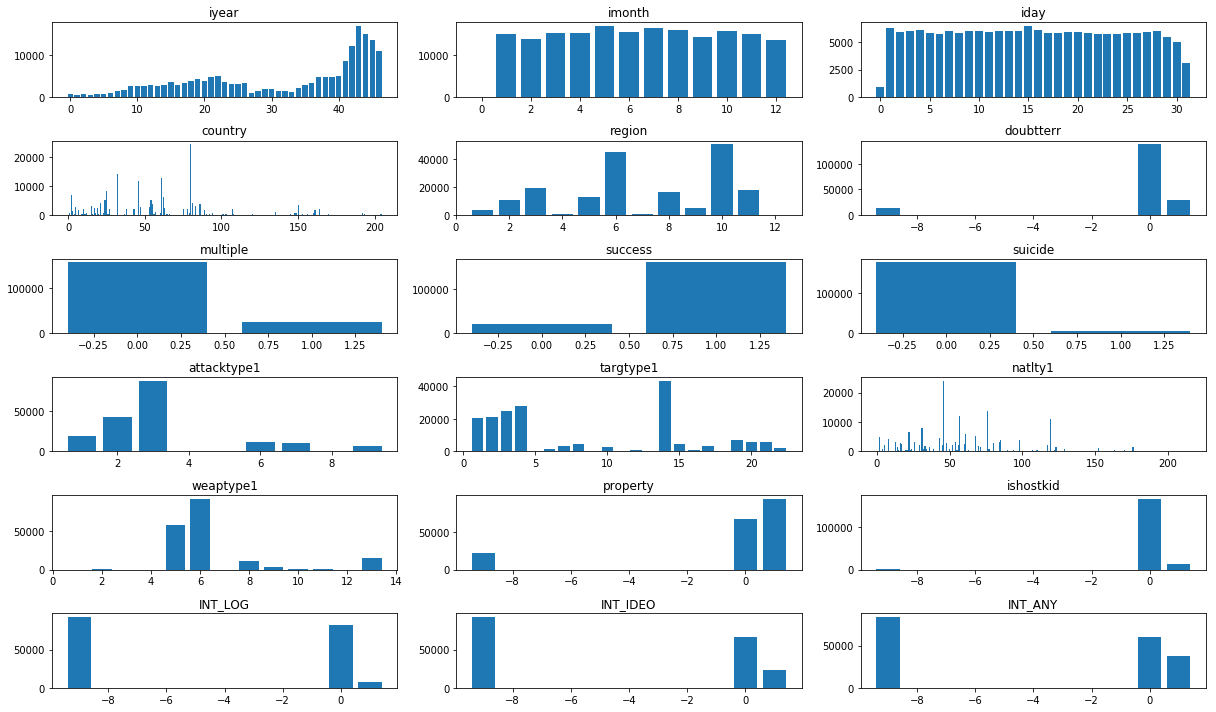

In [149]:
# checking frequency of column values
plt.figure(figsize=(17,10))
i = 0
for col in df.columns:
    if col=='latitude' or col=='longitude' or col=='city' or col=='provstate' or col=='target1' or col=='gname':
        continue
    i += 1
    plt.subplot(6, 3, i)
    num_list = df[col].value_counts()
    plt.bar(num_list.index, num_list.values)
    plt.title(col)
plt.tight_layout()   
plt.show()

In [150]:
# classes having less than 600 samples were dropped from the dataframe to remove skewedness in data
num = df['gname'].value_counts()
res = num.where(num>600).dropna()
res

2       82782.0
2001     7478.0
3024     5613.0
455      4555.0
478      3351.0
2699     3288.0
15       2772.0
46       2671.0
203      2487.0
2819     2418.0
1057     2310.0
78       2024.0
2589     1878.0
631      1630.0
221      1606.0
123      1561.0
2695     1351.0
36       1125.0
2632     1062.0
2549     1020.0
948       895.0
1019      830.0
863       716.0
157       639.0
2526      638.0
598       632.0
3136      624.0
281       607.0
Name: gname, dtype: float64

In [151]:
k = []
c = 0
for index, row in df.iterrows():
    if row['gname'] not in list(res.index):
        k.append(index)
    if row['gname']==2:
        c += 1
        if c>5000:
            k.append(index)

In [152]:
df.drop(index=k, inplace=True)

In [153]:
df.shape

(60781, 24)

In [155]:
# converts labels to one-hot encoding
y = pd.get_dummies(df['gname']).values

In [156]:
y.shape

(60781, 28)

In [157]:
# normalizing feature values
x = df.drop(columns='gname')
x = x.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [158]:
x_scaled.shape

(60781, 23)

In [159]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.083333,0.000000,0.010,0.363636,0.000708,0.000082,0.572701,0.824064,0.9,...,0.000,0.428571,0.000035,0.009302,1.000000,0.9,0.9,0.0,0.0,1.0
1,0.0,0.083333,0.000000,0.015,0.636364,0.001062,0.000109,0.782926,0.496657,0.9,...,0.250,0.285714,0.000047,0.009302,0.363636,1.0,0.9,0.0,0.0,1.0
2,0.0,0.083333,0.000000,0.020,0.272727,0.001416,0.000136,0.741690,0.857187,0.0,...,0.750,0.285714,0.000058,0.009302,0.545455,1.0,0.9,0.0,0.0,1.0
3,0.0,0.083333,0.064516,0.025,0.000000,0.002478,0.000218,0.781007,0.003068,1.0,...,0.250,0.952381,0.000093,0.009302,0.363636,1.0,0.9,0.0,0.0,0.0
4,0.0,0.083333,0.258065,0.035,0.636364,0.003540,0.000327,0.819274,0.458544,0.0,...,0.375,0.238095,0.000151,0.009302,0.272727,0.9,0.9,0.0,0.0,1.0


In [160]:
# saving file for future use
np.save('x_normed.npy', x_scaled)
np.save('y.npy', y)

# Classification

In [69]:
x = np.load('x_normed.npy')
y = np.load('y.npy')

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [71]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(54702, 23) (54702, 28) (6079, 23) (6079, 28)


In [72]:
model1 = svm.SVC(C=5, kernel='rbf')
model2 = DecisionTreeClassifier()

In [73]:
model1.fit(x_train, np.argmax(y_train, axis=1))

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
model2.fit(x_train, np.argmax(y_train, axis=1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
pred1 = model1.predict(x_test)
acc1 = np.mean(pred1==np.argmax(y_test, axis=1))*100

pred2 = model2.predict(x_test)
acc2 = np.mean(pred2==np.argmax(y_test, axis=1))*100

In [76]:
print('Accuracy SVC: {:.2f}%\nAccuracy Desicion Tree: {:.2f}%'.format(acc1, acc2))

Accuracy SVC: 96.55%
Accuracy Desicion Tree: 98.27%


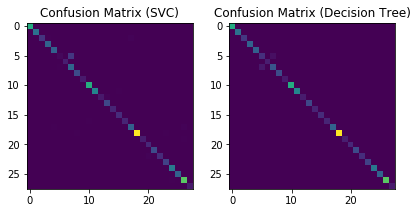

In [77]:
cm1 = confusion_matrix(np.argmax(y_test, axis=1), pred1)
cm2 = confusion_matrix(np.argmax(y_test, axis=1), pred2)

plt.subplot(1, 2, 1)
plt.imshow(cm1)
plt.title('Confusion Matrix (SVC)')

plt.subplot(1, 2, 2)
plt.imshow(cm2)
plt.title('Confusion Matrix (Decision Tree)')

plt.tight_layout()
plt.show()

In [78]:
pr1 = precision_recall_fscore_support(np.argmax(y_test, axis=1), pred1)
pr2 = precision_recall_fscore_support(np.argmax(y_test, axis=1), pred2)

print('SVC\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF-score: {:.2f}%'.format(np.mean(pr1[0])*100, np.mean(pr1[1])*100, np.mean(pr1[2])*100))
print('\nDecision Tree\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF-score: {:.2f}%'.format(np.mean(pr2[0])*100, np.mean(pr2[1])*100, np.mean(pr2[2])*100))

SVC
Precision: 96.12%
Recall: 94.68%
F-score: 94.52%

Decision Tree
Precision: 97.76%
Recall: 97.95%
F-score: 97.84%
